### Part 03. 통계분석

<br>

-----------------

## 5장. 상관분석

<p style='color:#726a77; text-align:right'>오민지 작성</p>

### 1절. 상관분석 개념
* 두 변수 간의 관계의 정도     
__가.__ 공분산   
* 두 확률변수가 함께 변화하는지의 정도를 측정하는 값
    * 단점: 측정 단위 크기를 반영하지 못해 절대적인 상관성의 정도를 파악하기 어려움
    * 단점 극복: 공분산을 두 변수의 표준편차 곱으로 나누어 표준화시킴 (= 상관계수)



### 2절. 상관분석의 유형
__가.__ 피어슨 상관계수
* 두 연속형 자료가 모두 정규성을 따른다는 가정
* 선형적 상관관계를 측정
* -1부터 1사이의 값    

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">판다스 사용 시</td>
            <td style="text-align: left;">corr(method='pearson')</td>
        </tr>
        <tr>
            <td style="text-align: left;">싸이파이 사용 시</td>
            <td style="text-align: left;">stats.pearsonr(df1, df2)</td>
        </tr>
    </table>
</div>   

__나.__ 스피어만 상관계수
* 두 변수가 정규성을 만족하지 않거나, 변수가 순위 및 순서 형태로 주어지는 경우
* 비모수적 방법 (데이터에 순위를 매긴 후 그 순위에 대한 상관계수를 산출함. 실제값 이용 X)
* -1부터 1사이의 값
* 비선형관계의 연관성 파악 가능
* 연속형, 이산형, 순서형 자료에 적용 가능

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">판다스 사용 시</td>
            <td style="text-align: left;">corr(method='spearman')</td>
        </tr>
        <tr>
            <td style="text-align: left;">싸이파이 사용 시</td>
            <td style="text-align: left;">stats.spearmanr(df1, df2) </td>
        </tr>
    </table>
</div>        


__다.__ 켄달의 순위상관계수
* 데이터가 순서쌍(Xi, Yi)로 주어졌을 때
    * Xi가 커짐에 따라 Yi도 커질 경우: 부합
    * Xi가 커짐에 따라 Yi가 작아질 경우: 비부함
* 전체 데이터에서 비부합상에 대한 부합쌍의 비율로 상관계수를 산출함
* -1부터 1사이의 값
    * 순위상관계수가 1일 경우: 부합쌍의 비율이 100%
    * 순위상관계수가 -1일 경우: 비부합쌍의 비율이 100%
    * 순위상관계수가 0일 경우: 두 변수 X와 Y는 상관성이 없음

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">판다스 사용 시</td>
            <td style="text-align: left;">corr(method='kendall')</td>
        </tr>
        <tr>
            <td style="text-align: left;">싸이파이 사용 시</td>
            <td style="text-align: left;">stats.kendalltau(df1, df2) </td>
        </tr>
    </table>
</div>   

![python image2](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F995D484B5F6B423434F902)

### 3절. 상관계수 검정
* 귀무가설(H0) : 변수1과 변수2 사이에 상관관계가 없다
* 대립가설(H1) : 변수1과 변수2 사이에 상관관계가 있다
* p-value가 유의수준(0.05) 이하인 경우, 귀무가설 기각

__[예제1]__    
airquality 데이터에서 Ozone, Solar.R, Wind, Temp 만으로 이루어진 데이터프레임 air를 생성하고, 네 가지 변수에 대한 상관계수를 산출하기      
(단, 모든 변수값에 Na가 없는 데이터만 이용. 세 가지 상관분석 방법 사용)

In [1]:
import pandas as pd

In [2]:
air = pd.read_csv('airquality.csv')
air = air.iloc[:, 0:4]

# 판다스의 함수는 '상관계수행렬'을 리턴함
# 자동으로 Na값을 제외해줌

In [3]:
air.corr(method='pearson')

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.601547,0.698360
Solar.R,0.348342,1.000000,-0.056792,0.275840
Wind,-0.601547,-0.056792,1.000000,-0.457988
Temp,0.698360,0.275840,-0.457988,1.000000


In [4]:
air.corr(method='spearman')

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348186,-0.590155,0.774043
Solar.R,0.348186,1.000000,-0.000977,0.207428
Wind,-0.590155,-0.000977,1.000000,-0.446541
Temp,0.774043,0.207428,-0.446541,1.000000


In [5]:
air.corr(method='kendall')

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.240319,-0.428360,0.586299
Solar.R,0.240319,1.000000,0.000679,0.144234
Wind,-0.428360,0.000679,1.000000,-0.322242
Temp,0.586299,0.144234,-0.322242,1.000000


In [6]:
from scipy import stats

# 싸이파이 함수는 '상관계수'와 'p-value'를 array로 리턴함
# 결측치를 자동으로 제외해주지 않음

In [25]:
### (1) 결측치 있는 데이터로 실행
cor, pv = stats.spearmanr(air) # x는 상관계수, y는 p-value

In [22]:
print(cor, '\n\n', type(cor))

-0.6124965763142118 

 <class 'numpy.float64'>


In [23]:
print(pv, '\n\n', type(pv))

9.089415326542857e-13 

 <class 'numpy.float64'>


In [9]:
### (2) 결측치 없는 데이터로 실행
air_com = air.dropna()

In [15]:
cor_2, pv_2 = stats.pearsonr(air_com)

TypeError: pearsonr() missing 1 required positional argument: 'y'

In [12]:
print(cor_2, '\n\n', type(cor_2))

[[ 1.          0.34818647 -0.60513642  0.77293193]
 [ 0.34818647  1.         -0.06169636  0.20953692]
 [-0.60513642 -0.06169636  1.         -0.49932278]
 [ 0.77293193  0.20953692 -0.49932278  1.        ]] 

 <class 'numpy.ndarray'>


In [13]:
print(pv_2, '\n\n', type(pv_2))

[[0.00000000e+00 1.80588497e-04 1.99808235e-12 2.85570861e-23]
 [1.80588497e-04 0.00000000e+00 5.20051145e-01 2.73013801e-02]
 [1.99808235e-12 5.20051145e-01 0.00000000e+00 2.42634385e-08]
 [2.85570861e-23 2.73013801e-02 2.42634385e-08 0.00000000e+00]] 

 <class 'numpy.ndarray'>


__[예제 2]__   
air 데이터 내의 네 가지 변수 조합별 피어슨 상관계수 그래프 그리기

<seaborn의 pairplot>  
> seaborn.pairplot(data, hue=None, kind='scatter', diag_kind='auto', markers=None, dropna=False, corner=True)
> - data : pandas.DataFrame
> - hue : 데이터의 범주형 변수. 집단을 색으로 구분해서 플롯을 그려줌
> - kind : 'scatter'(산점도), 'kde'(밀도그래프), 'hist'(히스토그램), 'reg'(회귀선)로 구성.
> - diag_kind : 'auto', 'hist', 'kde', None으로 구성
> - markers : 마커 코드
> - corner : True로 할 경우 세모 모양 상관계수 그래프 (디폴트는 False)

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

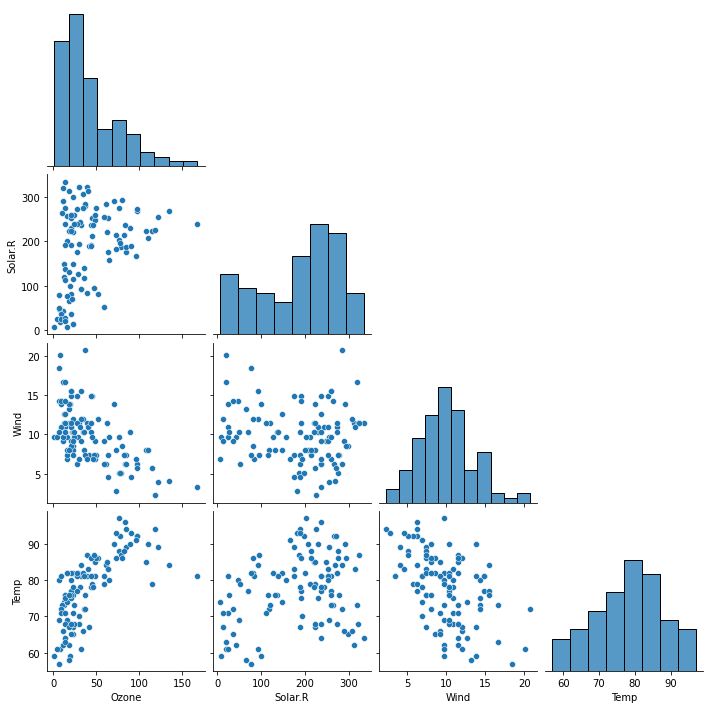

In [96]:
air_cor = air.corr(method='pearson')
sns.pairplot(air_com, corner = True)
plt.show()

In [89]:
air_cor.style.background_gradient(cmap='coolwarm')

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.601547,0.698360
Solar.R,0.348342,1.000000,-0.056792,0.275840
Wind,-0.601547,-0.056792,1.000000,-0.457988
Temp,0.698360,0.275840,-0.457988,1.000000


<AxesSubplot:>

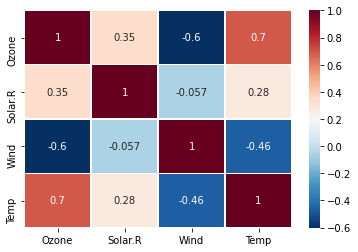

In [95]:
sns.heatmap(air_cor,
           xticklabels = air_cor.columns,
           yticklabels = air_cor.columns,
           cmap='RdBu_r',
           annot=True,  # True: 상관계수 텍스트로 보이게 해줌
           linewidth=0.5)

__[예제 3]__  
air 데이터의 Ozone 과 Wind 변수에 대한 상관분석 실시하고, 피어슨 상관계수에 대한 검정결과 해석하기

In [66]:
stats.pearsonr(air['Ozone'], air['Wind'])

ValueError: array must not contain infs or NaNs

In [78]:
c, p = stats.pearsonr(air_com['Ozone'], air_com['Wind'])
print('상관계수: {}\n\np-value: {}'.format(c, p))

상관계수: -0.6124965763142121

p-value: 9.089415326542639e-13


< 결과 해석 >    
p-value가 유의수준 0.05 이하이므로, 귀무가설을 기각함    
즉, Ozone과 Wind변수 간 상관계수는 0이 아님 (상관계수 약 -0.6)